In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
cdnow=pd.read_table('CDNOW.txt',names=['id','time','amonut','volume'],sep='\s+')
cdnow.head()

,id,time,amonut,volume
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


In [7]:
cdnow.to_csv('cdnow.csv')
cdnow=pd.read_csv('cdnow.csv')
cdnow=cdnow.iloc[:,1:]
cdnow.head()

,id,time,amonut,volume
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


In [8]:
cdnow.describe()

,id,time,amonut,volume
count,69659.000000,6.965900e+04,69659.000000,69659.000000
mean,11470.854592,1.997228e+07,2.410040,35.893648
std,6819.904848,3.837735e+03,2.333924,36.281942
min,1.000000,1.997010e+07,1.000000,0.000000
25%,5506.000000,1.997022e+07,1.000000,14.490000
50%,11410.000000,1.997042e+07,2.000000,25.980000
75%,17273.000000,1.997111e+07,3.000000,43.700000
max,23570.000000,1.998063e+07,99.000000,1286.010000


### 购买金额分析

In [33]:
# 缺失值个数
sum(cdnow['volume'].isnull())

4918

In [37]:
# 最小交易额
min(cdnow['volume'])

10.0

In [38]:
# 最大交易额
max(cdnow['volume'])

498.48

In [40]:
# 平均交易额
np.mean(cdnow['volume'])

34.70690041859116

(array([5.6538e+04, 1.0999e+04, 1.8330e+03, 2.0300e+02, 5.1000e+01,
        2.0000e+01, 9.0000e+00, 3.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([  0.   ,  49.848,  99.696, 149.544, 199.392, 249.24 , 299.088,
        348.936, 398.784, 448.632, 498.48 ]),
 <a list of 10 Patch objects>)

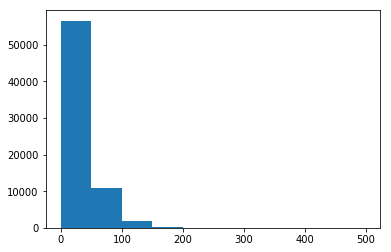

In [80]:
# 交易额大部分集中在100以下
plt.hist(cdnow['volume'].fillna(0))

### 交易量

In [68]:
# 缺失值个数
sum(cdnow['amonut'].isnull())

3

In [69]:
# 最小交易量
min(cdnow['amonut'])

1.0

In [70]:
# 最小交易量
max(cdnow['amonut'])

932.23

(array([6.8569e+04, 6.2600e+02, 3.3200e+02, 8.3000e+01, 2.7000e+01,
        1.1000e+01, 5.0000e+00, 1.0000e+00, 3.0000e+00, 2.0000e+00]),
 array([ -1.   ,  92.323, 185.646, 278.969, 372.292, 465.615, 558.938,
        652.261, 745.584, 838.907, 932.23 ]),
 <a list of 10 Patch objects>)

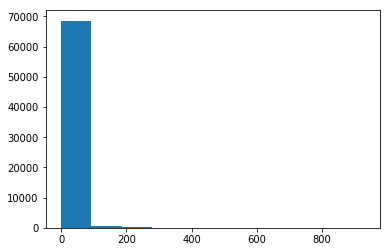

In [81]:
# 交易量大都集中在100以下
plt.hist(cdnow['amonut'].fillna(-1))

### 计算每笔平均交易额

In [85]:
# 计算平均交易额
cdnow['mean_volume']=cdnow['volume']/cdnow['amonut']

(array([6.6995e+04, 2.2780e+03, 2.6400e+02, 6.5000e+01, 2.7000e+01,
        1.4000e+01, 3.0000e+00, 5.0000e+00, 4.0000e+00, 4.0000e+00]),
 array([ -1.   ,  29.699,  60.398,  91.097, 121.796, 152.495, 183.194,
        213.893, 244.592, 275.291, 305.99 ]),
 <a list of 10 Patch objects>)

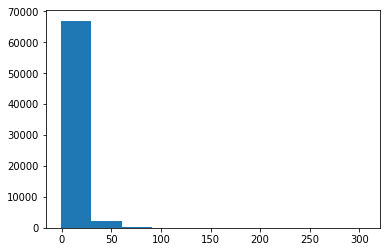

In [84]:
# 每笔平均交易额大都集中在50以下
plt.hist(cdnow['mean_volume'].fillna(-1))

### 用户累积购买分析

In [9]:
# 用户累积购买量
cdnow.groupby('id')['amonut'].sum()

id
1         1
2         6
3        16
4         7
5        29
6         1
7        18
8        18
9         6
10        3
11        4
12        4
13        4
14        2
15        4
16        8
17        5
18        1
19       11
20       46
21        4
22        1
23        2
24        4
25       12
26        6
27       10
28        7
29       28
30        2
         ..
23541     2
23542     5
23543     2
23544    12
23545     1
23546     1
23547     2
23548     2
23549     2
23550     2
23551    12
23552     4
23553     8
23554     3
23555    14
23556    15
23557     1
23558    11
23559     8
23560     1
23561     6
23562     2
23563     3
23564     5
23565     1
23566     2
23567     1
23568     6
23569     2
23570     5
Name: amonut, Length: 23570, dtype: int64

In [10]:
# 用户购买量最大订单号
cdnow.groupby('id')['amonut'].max()

id
1         1
2         5
3         5
4         2
5         4
6         1
7         9
8         7
9         2
10        3
11        1
12        4
13        4
14        2
15        4
16        4
17        5
18        1
19       10
20       27
21        3
22        1
23        2
24        3
25        3
26        3
27        6
28        3
29        4
30        1
         ..
23541     1
23542     5
23543     2
23544     5
23545     1
23546     1
23547     1
23548     2
23549     2
23550     2
23551     4
23552     2
23553     4
23554     2
23555     4
23556     3
23557     1
23558     4
23559     3
23560     1
23561     3
23562     2
23563     2
23564     3
23565     1
23566     2
23567     1
23568     4
23569     2
23570     3
Name: amonut, Length: 23570, dtype: int64

In [11]:
# 用户累积购买总金额
cdnow.groupby('id')['volume'].sum()

id
1         11.77
2         89.00
3        156.46
4        100.50
5        385.61
6         20.99
7        264.67
8        197.66
9         95.85
10        39.31
11        58.55
12        57.06
13        72.94
14        29.92
15        52.87
16        79.87
17        73.22
18        14.96
19       175.12
20       653.01
21        75.11
22        14.37
23        24.74
24        57.77
25       137.53
26       102.69
27       135.87
28        90.99
29       435.81
30        28.34
          ...  
23541     57.34
23542     77.43
23543     50.76
23544    134.63
23545     24.99
23546     13.97
23547     23.54
23548     23.54
23549     27.13
23550     25.28
23551    264.63
23552     49.38
23553     98.58
23554     36.37
23555    189.18
23556    203.00
23557     14.37
23558    145.60
23559    111.65
23560     18.36
23561     83.46
23562     29.33
23563     58.75
23564     70.01
23565     11.77
23566     36.00
23567     20.97
23568    121.70
23569     25.74
23570     94.08
Name: volume, Length:

In [12]:
# 用户单笔购买最大金额
cdnow.groupby('id')['amonut'].max()

id
1         1
2         5
3         5
4         2
5         4
6         1
7         9
8         7
9         2
10        3
11        1
12        4
13        4
14        2
15        4
16        4
17        5
18        1
19       10
20       27
21        3
22        1
23        2
24        3
25        3
26        3
27        6
28        3
29        4
30        1
         ..
23541     1
23542     5
23543     2
23544     5
23545     1
23546     1
23547     1
23548     2
23549     2
23550     2
23551     4
23552     2
23553     4
23554     2
23555     4
23556     3
23557     1
23558     4
23559     3
23560     1
23561     3
23562     2
23563     2
23564     3
23565     1
23566     2
23567     1
23568     4
23569     2
23570     3
Name: amonut, Length: 23570, dtype: int64

In [14]:
# 用户购买笔数
cdnow.groupby('id').count()['time']

id
1         1
2         2
3         6
4         4
5        11
6         1
7         3
8         8
9         3
10        1
11        4
12        1
13        1
14        1
15        1
16        4
17        1
18        1
19        2
20        2
21        2
22        1
23        1
24        2
25        8
26        2
27        2
28        3
29       12
30        2
         ..
23541     2
23542     1
23543     1
23544     3
23545     1
23546     1
23547     2
23548     1
23549     1
23550     1
23551     6
23552     2
23553     2
23554     2
23555     5
23556     7
23557     1
23558     4
23559     3
23560     1
23561     3
23562     1
23563     2
23564     3
23565     1
23566     1
23567     1
23568     3
23569     1
23570     2
Name: time, Length: 23570, dtype: int64